# Machine Learning Project on Adult Income Prediction

### Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
data=pd.read_csv('/content/adult.data')

In [4]:
column_names = ['age','workclass' ,'fnlwgt' ,'education' ,'educational-num' , 'marital-status' ,'occupation' ,'relationship' , 'race' ,'gender' ,'capital-gain' , 'capital-loss' , 'hours-per-week' ,'native-country'  ,'income' ]
data.columns = column_names
data.head(10)

age          workclass  fnlwgt      education  educational-num  \
0   50   Self-emp-not-inc   83311      Bachelors               13   
1   38            Private  215646        HS-grad                9   
2   53            Private  234721           11th                7   
3   28            Private  338409      Bachelors               13   
4   37            Private  284582        Masters               14   
5   49            Private  160187            9th                5   
6   52   Self-emp-not-inc  209642        HS-grad                9   
7   31            Private   45781        Masters               14   
8   42            Private  159449      Bachelors               13   
9   37            Private  280464   Some-college               10   

           marital-status          occupation    relationship    race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-spouse   Handlers-cleaners         Husband   Black   
3      Married-civ-spouse      Prof-specialty            Wife   Black   
4      Married-civ-spouse     Exec-managerial            Wife   White   
5   Married-spouse-absent       Other-service   Not-in-family   Black   
6      Married-civ-spouse     Exec-managerial         Husband   White   
7           Never-married      Prof-specialty   Not-in-family   White   
8      Married-civ-spouse     Exec-managerial         Husband   White   
9      Married-civ-spouse     Exec-managerial         Husband   Black   

    gender  capital-gain  capital-loss  hours-per-week  native-country  income  
0     Male             0             0              13   United-States   <=50K  
1     Male             0             0              40   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3   Female             0             0              40            Cuba   <=50K  
4   Female             0             0              40   United-States   <=50K  
5   Female             0             0              16         Jamaica   <=50K  
6     Male             0             0              45   United-States    >50K  
7   Female         14084             0              50   United-States    >50K  
8     Male          5178             0              40   United-States    >50K  
9     Male             0             0              80   United-States    >50K

In [9]:
data.tail(10)

age      workclass  fnlwgt      education  educational-num  \
32550   32        Private   34066           10th                6   
32551   43        Private   84661      Assoc-voc               11   
32552   32        Private  116138        Masters               14   
32553   53        Private  321865        Masters               14   
32554   22        Private  310152   Some-college               10   
32555   27        Private  257302     Assoc-acdm               12   
32556   40        Private  154374        HS-grad                9   
32557   58        Private  151910        HS-grad                9   
32558   22        Private  201490        HS-grad                9   
32559   52   Self-emp-inc  287927        HS-grad                9   

            marital-status          occupation    relationship  \
32550   Married-civ-spouse   Handlers-cleaners         Husband   
32551   Married-civ-spouse               Sales         Husband   
32552        Never-married        Tech-support   Not-in-family   
32553   Married-civ-spouse     Exec-managerial         Husband   
32554        Never-married     Protective-serv   Not-in-family   
32555   Married-civ-spouse        Tech-support            Wife   
32556   Married-civ-spouse   Machine-op-inspct         Husband   
32557              Widowed        Adm-clerical       Unmarried   
32558        Never-married        Adm-clerical       Own-child   
32559   Married-civ-spouse     Exec-managerial            Wife   

                      race   gender  capital-gain  capital-loss  \
32550   Amer-Indian-Eskimo     Male             0             0   
32551                White     Male             0             0   
32552   Asian-Pac-Islander     Male             0             0   
32553                White     Male             0             0   
32554                White     Male             0             0   
32555                White   Female             0             0   
32556                White     Male             0             0   
32557                White   Female             0             0   
32558                White     Male             0             0   
32559                White   Female         15024             0   

       hours-per-week  native-country  income  
32550              40   United-States   <=50K  
32551              45   United-States   <=50K  
32552              11          Taiwan   <=50K  
32553              40   United-States    >50K  
32554              40   United-States   <=50K  
32555              38   United-States   <=50K  
32556              40   United-States    >50K  
32557              40   United-States   <=50K  
32558              20   United-States   <=50K  
32559              40   United-States    >50K

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   fnlwgt           32560 non-null  int64 
 3   education        32560 non-null  object
 4   educational-num  32560 non-null  int64 
 5   marital-status   32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   gender           32560 non-null  object
 10  capital-gain     32560 non-null  int64 
 11  capital-loss     32560 non-null  int64 
 12  hours-per-week   32560 non-null  int64 
 13  native-country   32560 non-null  object
 14  income           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.shape

(32560, 15)

In [7]:
data.describe().T

count           mean            std      min       25%  \
age              32560.0      38.581634      13.640642     17.0      28.0   
fnlwgt           32560.0  189781.814373  105549.764924  12285.0  117831.5   
educational-num  32560.0      10.080590       2.572709      1.0       9.0   
capital-gain     32560.0    1077.615172    7385.402999      0.0       0.0   
capital-loss     32560.0      87.306511     402.966116      0.0       0.0   
hours-per-week   32560.0      40.437469      12.347618      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178363.0  237054.5  1484705.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [10]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


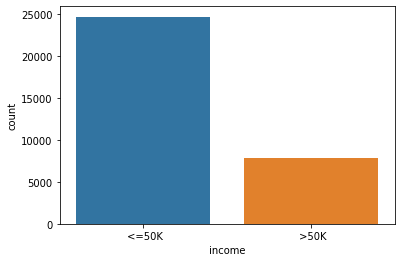

In [11]:
sns.countplot(data.income)